In [1]:
#Importamos las bibliotecas necesarias
import cv2 #para imágenes, Open CV (Computer Vision)
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1

In [15]:
im1_lung=cv2.imread('lung_chanfleada.png') #leemos la imagen
im1_lung=cv2.cvtColor(im1_lung,cv2.COLOR_BGR2RGB) #convertimos al formato RGB 

In [16]:
im1_lung.shape

(658, 648, 3)

Imagen de 658x648 con 3 canales

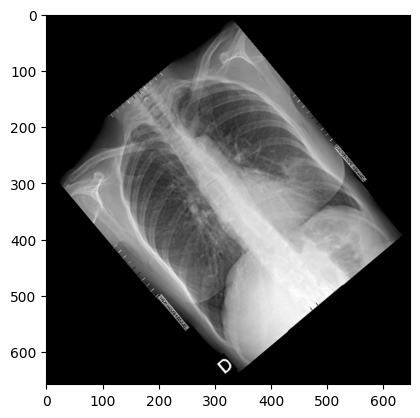

In [17]:
plt.imshow(im1_lung) #mostramos la imagen en sus 3 canales.

(658, 648)


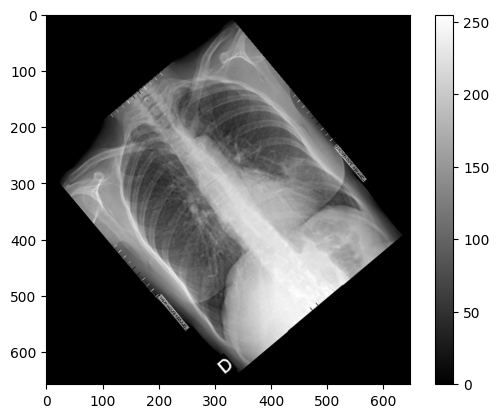

In [20]:
im1_lung_gray=cv2.cvtColor(im1_lung,cv2.COLOR_BGR2GRAY) #convertimos la imagen a escala de grises
print(im1_lung_gray.shape)
plt.imshow(im1_lung_gray,cmap='gray') #mostramos la imagen en escala de grises
plt.colorbar() #mostramos la barra de colores

Tipo de datos de las imagenes

In [21]:
print(im1_lung.dtype)
print(im1_lung_gray.dtype)

uint8
uint8


### Monocroma

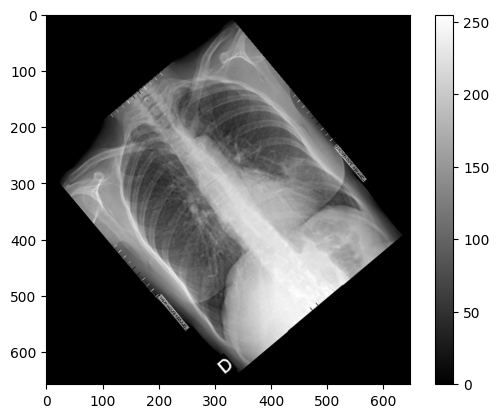

In [22]:
plt.imshow(im1_lung_gray,cmap='gray',vmin=0,vmax=255) #mostramos la imagen en escala de grises
plt.colorbar() #mostramos la barra de colores

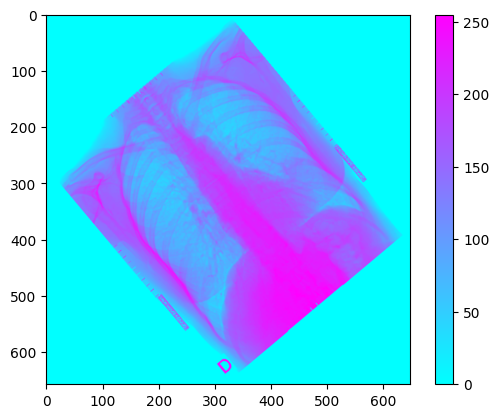

In [23]:
plt.imshow(im1_lung_gray,cmap='cool',vmin=0,vmax=255) #mostramos la imagen en escala de grises
plt.colorbar() #mostramos la barra de colores

### Color

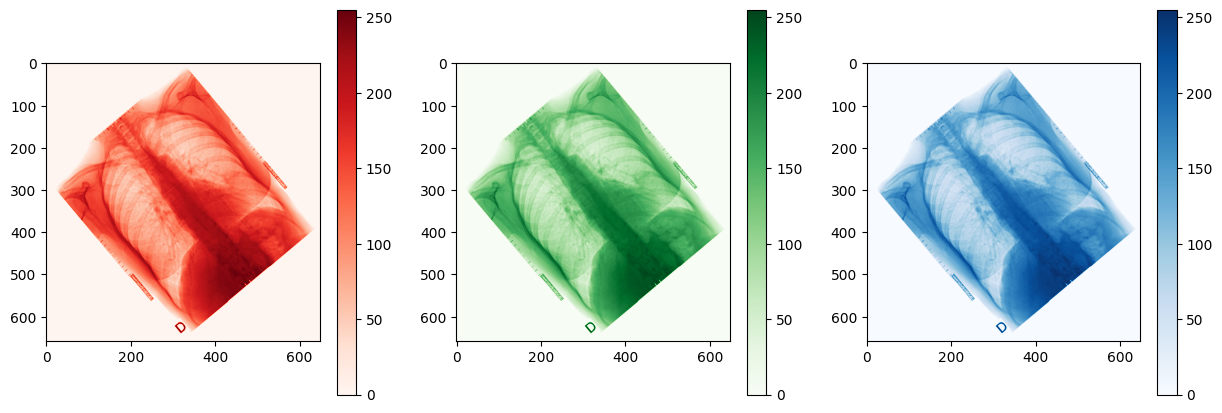

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im1_lung[:,:,0],cmap='Reds',vmin=0,vmax=255)
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(im1_lung[:,:,1],cmap='Greens',vmin=0,vmax=255)
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(im1_lung[:,:,2],cmap='Blues',vmin=0,vmax=255)
plt.colorbar()

# Ejericio 2

(502, 852, 3)
uint8


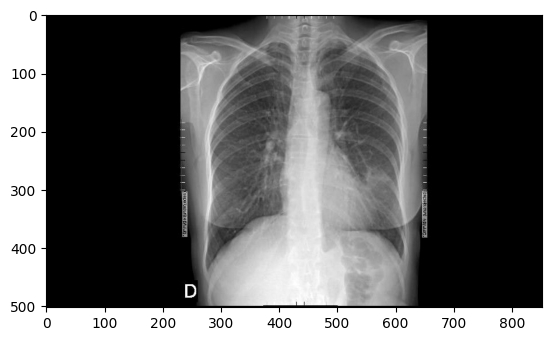

In [5]:
neumonia=cv2.imread('neumonia_izq.jpg') #leemos la imagen
print(neumonia.shape)
print(neumonia.dtype)
plt.imshow(neumonia)

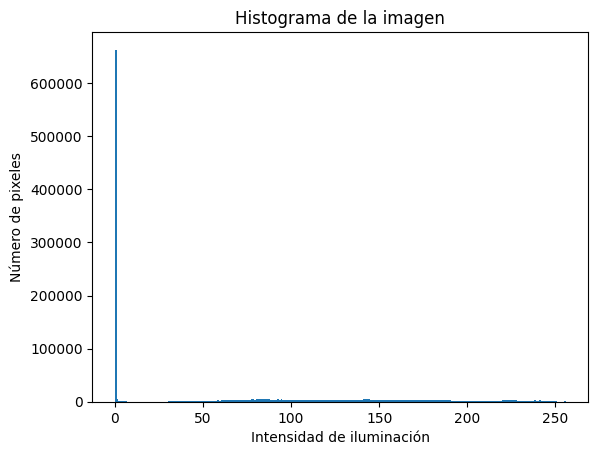

In [11]:
plt.xlabel('Intensidad de iluminación')
plt.ylabel('Número de pixeles')
plt.title('Histograma de la imagen')
plt.hist(neumonia.ravel(),256,[0,256]); plt.show()

Tenemos tanto "negro" (es decir, cantidad de pixeles con intensidad 0) que las demás componentes no se aprecian. 

## Imagen recortada

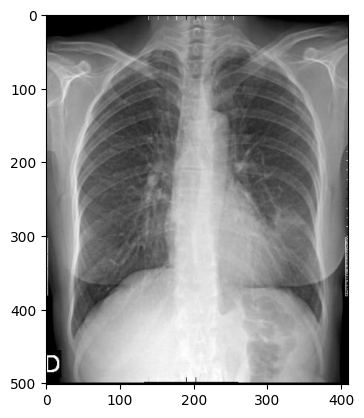

In [13]:
new_imag=neumonia[:,240:650] #Esto es a recontra ojo
plt.imshow(new_imag)

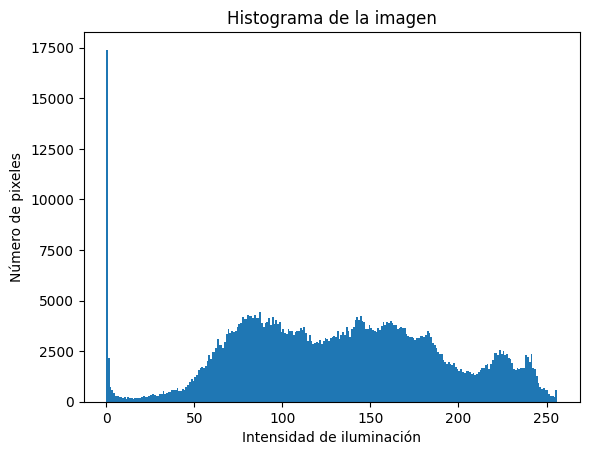

In [14]:
plt.xlabel('Intensidad de iluminación')
plt.ylabel('Número de pixeles')
plt.title('Histograma de la imagen')
plt.hist(new_imag.ravel(),256,[0,256]); plt.show()

Recortando la imagen y sacando los elementos negros, se resalta más las demás tonalidades de grises.

Mirar bien el órden de Números de pixeles entre los 2 histogramas.

# Ejercicio 3

Retomando la imagen del Ejercicio 1 del pulmón

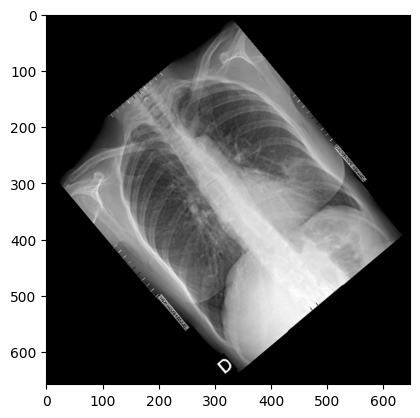

In [26]:
plt.imshow(im1_lung)

In [27]:
#Importar la libreria pertinente 
from scipy.ndimage import rotate 

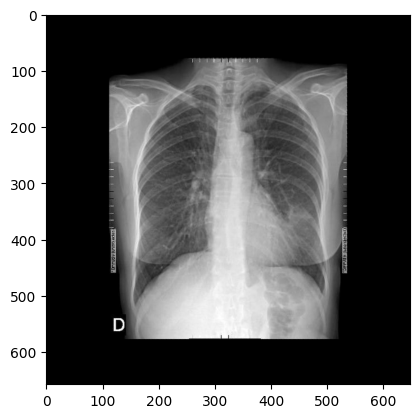

In [31]:
alpha=-40
im1_lung_rot=rotate(im1_lung,alpha,reshape=False)
plt.imshow(im1_lung_rot)

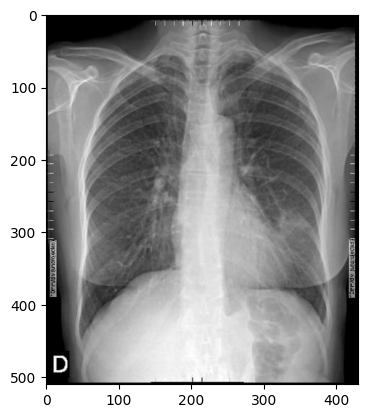

In [35]:
im1_lung_rot_reshape=im1_lung_rot[70:580,110:540]
plt.imshow(im1_lung_rot_reshape)

# Ejercicio 4

## Imagen Original

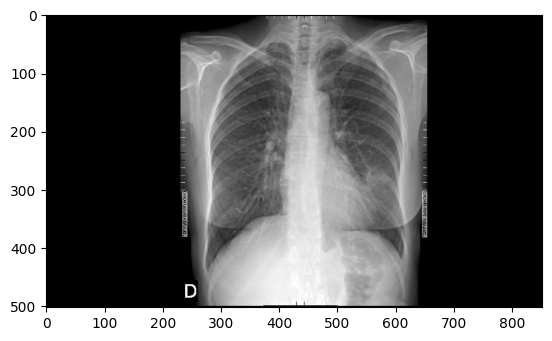

In [79]:
neumo_new=neumonia[:,:,0]
plt.imshow(neumo_new,cmap='gray')

## Con transformación Log

In [76]:
c=0.25

neumo_log = c* np.log(1 + abs(neumo_new))

neumo_log.shape

/var/folders/dy/db3x5hy96gj89sp9wkf5ws8r0000gn/T/ipykernel_1000/3241118816.py:3: RuntimeWarning: divide by zero encountered in log
  neumo_log = c* np.log(1 + abs(neumo_new))


(502, 852)

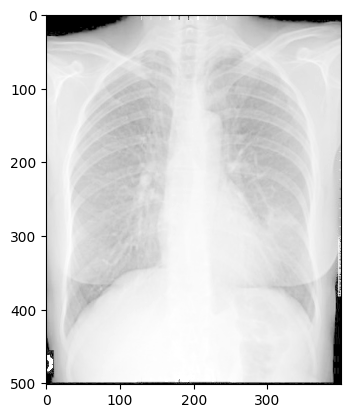

In [88]:
plt.imshow(neumo_log[:,250:650],cmap='gray')

## Con función Gamma

In [80]:
def imadjust(img, In=(0,1.0), Out=(0,1.0), gamma=1.0):
    "J = low_out +(high_out - low_out).* ((I - low_in)/(high_in - low_in)).^ gamma"
    low_in,high_in = In
    low_out, high_out = Out
 
    low_in *= 255.0
    high_in *= 255.0
 
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (high_in - low_in)
         # Gamma transformation table
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    imgOut = np.zeros((h,w), np.uint8)
    
    for r in range(h):
        for c in range(w):
            if img[r,c] <= low_in:
                imgOut[r,c] = low_out                
            elif img[r,c] > high_in:
                imgOut[r,c] = high_out
            else:
                res = int(k*(img[r,c]-low_in) + low_out)
                imgOut[r,c] = table[res]#Check table
               
    return imgOut

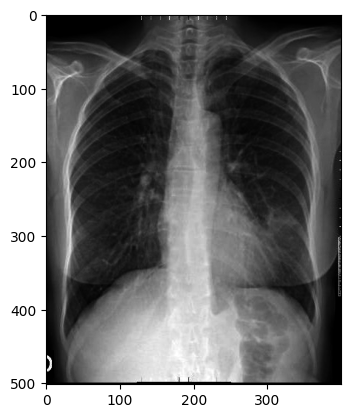

In [89]:
neumo_gamma=imadjust(neumo_new,(0,1),(0,1), 2)
plt.imshow(neumo_gamma[:,250:650],cmap='gray')

## Con cual se ve mejor 🤔?

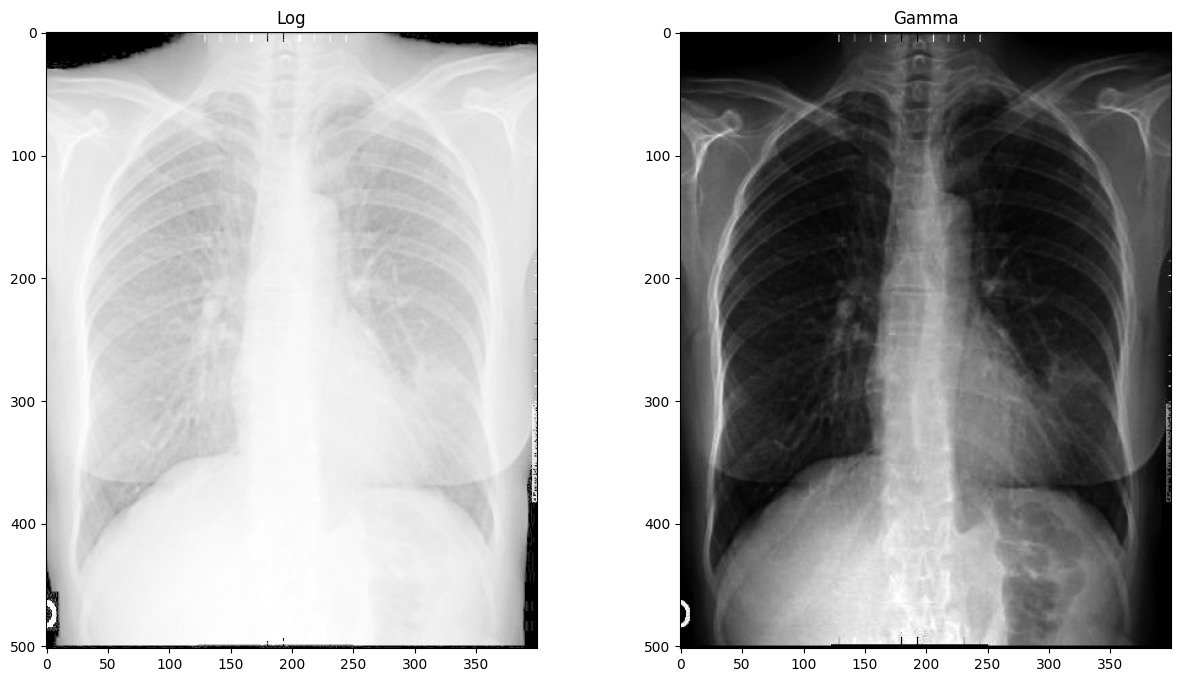

In [95]:
plt.figure(figsize=(15,8))
#Que imagen es mejor para detectar la neumonía?
plt.subplot(1,2,1)
plt.title('Log')
plt.imshow(neumo_log[:,250:650],cmap='gray')
plt.subplot(1,2,2)
plt.title('Gamma')
plt.imshow(neumo_gamma[:,250:650],cmap='gray')